# 1. Extract Data

In [537]:
import os
print(os.listdir(path="..\\"))

['.gitkeep', 'ANN', 'Income&Expenditure.csv']


In [538]:
import pandas as pd
data=pd.read_csv("..\\Income&Expenditure.csv").iloc[:,2:]
data

,Serial Number,Date,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving,Cumulative Saving,Total Balance
0,1,31-07-2023,Monday,Income,27700.0,Office,Online,27700.0,27700.00,206620.21
1,2,01-08-2023,Tuesday,Expenditure,720.9,Mobile Recharge,Online,26979.1,26979.10,205899.31
2,3,02-08-2023,Wednesday,None,0.0,None,None,26979.1,26979.10,205899.31
3,4,03-08-2023,Thursday,None,0.0,None,None,26979.1,26979.10,205899.31
4,5,04-08-2023,Friday,None,0.0,None,None,26979.1,26979.10,205899.31
...,...,...,...,...,...,...,...,...,...,...
264,255,31-01-2024,Wednesday,Income,27700.0,Office,Online,27700.0,160080.37,339000.58
265,256,01-02-2024,Thursday,None,0.0,None,None,27700.0,160080.37,339000.58
266,257,02-02-2024,Friday,None,0.0,None,None,27700.0,160080.37,339000.58
267,258,03-02-2024,Saturday,Expenditure,8000.0,NaN,Cash,19700.0,152080.37,331000.58


# 2. EDA

In [539]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial Number      269 non-null    int64  
 1   Date               269 non-null    object 
 2   Day                269 non-null    object 
 3   IncExp Status      269 non-null    object 
 4   Rupees             269 non-null    float64
 5   Pupose of IncExp   267 non-null    object 
 6   Payment mode       269 non-null    object 
 7   Monthly Saving     269 non-null    float64
 8   Cumulative Saving  269 non-null    float64
 9   Total Balance      269 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 21.1+ KB


In [540]:
data.isnull().sum()

Serial Number        0
Date                 0
Day                  0
IncExp Status        0
Rupees               0
Pupose of IncExp     2
Payment mode         0
Monthly Saving       0
Cumulative Saving    0
Total Balance        0
dtype: int64

In [541]:
data["Pupose of IncExp"].fillna("None",inplace=True)
data.isnull().sum()

Serial Number        0
Date                 0
Day                  0
IncExp Status        0
Rupees               0
Pupose of IncExp     0
Payment mode         0
Monthly Saving       0
Cumulative Saving    0
Total Balance        0
dtype: int64

In [542]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def f(i):
    data[i]=le.fit_transform(data[i])
for i in list(data.columns[data.dtypes=="object"]):
    if i != "Date":
        f(i)
data

,Serial Number,Date,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving,Cumulative Saving,Total Balance
0,1,31-07-2023,1,1,27700.0,29,2,27700.0,27700.00,206620.21
1,2,01-08-2023,5,0,720.9,22,2,26979.1,26979.10,205899.31
2,3,02-08-2023,6,2,0.0,28,1,26979.1,26979.10,205899.31
3,4,03-08-2023,4,2,0.0,28,1,26979.1,26979.10,205899.31
4,5,04-08-2023,0,2,0.0,28,1,26979.1,26979.10,205899.31
...,...,...,...,...,...,...,...,...,...,...
264,255,31-01-2024,6,1,27700.0,29,2,27700.0,160080.37,339000.58
265,256,01-02-2024,4,2,0.0,28,1,27700.0,160080.37,339000.58
266,257,02-02-2024,0,2,0.0,28,1,27700.0,160080.37,339000.58
267,258,03-02-2024,2,0,8000.0,28,0,19700.0,152080.37,331000.58


In [543]:
x=data.iloc[:,2:-2]
y=data.iloc[:,-1]
x

,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving
0,1,1,27700.0,29,2,27700.0
1,5,0,720.9,22,2,26979.1
2,6,2,0.0,28,1,26979.1
3,4,2,0.0,28,1,26979.1
4,0,2,0.0,28,1,26979.1
...,...,...,...,...,...,...
264,6,1,27700.0,29,2,27700.0
265,4,2,0.0,28,1,27700.0
266,0,2,0.0,28,1,27700.0
267,2,0,8000.0,28,0,19700.0


In [ ]:
y

0      206620.21
1      205899.31
2      205899.31
3      205899.31
4      205899.31
         ...    
264    339000.58
265    339000.58
266    339000.58
267    331000.58
268    330920.58
Name: Total Balance, Length: 269, dtype: float64

# 3. Feature Extraction

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm_x=MinMaxScaler(feature_range=(0,1000))
mm_y=MinMaxScaler(feature_range=(0,1000))

x_train=mm_x.fit_transform(x_train)
x_test=mm_x.transform(x_test)

y_train = mm_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = mm_y.transform(y_test.values.reshape(-1, 1))



# 4. ANN Layers

In [ ]:
from tensorflow import keras
model=keras.Sequential()

In [ ]:
model.add(keras.layers.Dense(units=20,activation='relu'))
model.add(keras.layers.Dense(units=5,activation='relu'))
model.add(keras.layers.Dense(units=1,activation='linear'))

In [ ]:
model.compile(optimizer='adam',loss='mse',metrics=["mse"])

# 5. Model Build

In [ ]:
model.add_metric

<bound method Layer.add_metric of <Sequential name=sequential_30, built=True>>

In [ ]:
model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 112581.9062 - mse: 112581.9062
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 92665.5547 - mse: 92665.5547
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 77743.0156 - mse: 77743.0156
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 67743.8750 - mse: 67743.8750
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 67677.8359 - mse: 67677.8359
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 66817.0234 - mse: 66817.0234
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 62589.1953 - mse: 62589.1953
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65572.3125 - mse: 65572.3125
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 63213.0156 - mse: 63213.0156
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 61665.4492 - mse: 61665.4492
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 63186.6953 - mse: 63186.6953
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

In [ ]:
y_pred=model.predict(x_test)
y_pred


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


array([[674.392   ],
       [199.85103 ],
       [287.31586 ],
       [422.61667 ],
       [424.33755 ],
       [207.39056 ],
       [466.33206 ],
       [218.76888 ],
       [325.70596 ],
       [325.7435  ],
       [394.9633  ],
       [403.4094  ],
       [151.66795 ],
       [ 93.411545],
       [ 96.5039  ],
       [393.9075  ],
       [282.66306 ],
       [ 81.46788 ],
       [169.38118 ],
       [120.684784],
       [496.56616 ],
       [256.91885 ],
       [ 75.21487 ],
       [422.8536  ],
       [214.1555  ],
       [292.134   ],
       [413.6771  ],
       [506.96652 ],
       [454.69107 ],
       [282.39188 ],
       [259.76004 ],
       [531.14813 ],
       [246.7867  ],
       [413.1055  ],
       [475.5438  ],
       [733.2536  ],
       [558.6801  ],
       [277.3909  ],
       [255.94615 ],
       [417.3884  ],
       [464.56424 ],
       [464.05466 ],
       [184.74458 ],
       [339.07092 ],
       [672.21405 ],
       [461.75797 ],
       [319.3305  ],
       [316.3

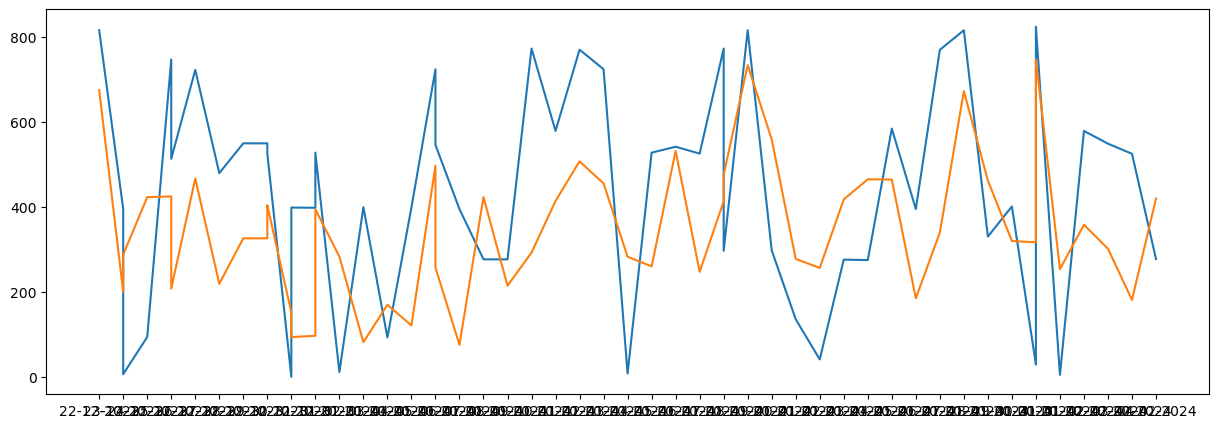

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[15,5])
plt.plot(data["Date"].iloc[len(data["Date"])-len(y_test):],y_test)
plt.plot(data["Date"].iloc[len(data["Date"])-len(y_test):],y_pred)
plt.show()